In [1]:
#importing madules
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from matplotlib.image import imread
from numpy.linalg import inv
from PIL import Image, ImageStat
import numpy

In [2]:
#defining color
color = [[0,0,255,255], [255,255,0,0]]

In [3]:
#testing data
testing_data = np.ndarray(shape=(512,512,4), dtype=np.integer)
for i in range(4):
    img = plt.imread(str(i+1)+'.gif')
    testing_data[:,:,i] = np.array(img[:,:,0])

In [4]:
#defining initial centroids
centroids=[]
for k in range(0, 2):
        cent =testing_data[numpy.random.randint(0,512), numpy.random.randint(0,512)]
        centroids.append(cent)
centroids= np.array(centroids)
print(centroids[0],centroids[1])

[41 26 29 37] [36 20 20 25]


In [5]:
#FUNCTION FOR EUCLIDEAN-DISTANCE
from math import * 
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

In [6]:
#k-mean for 2 cluster
center1=centroids[0]
center2=centroids[1]
mean1=0
mean2=0
print("Centroids Initialized. Starting Process")
print("===========================================")
for z in range(5):
    print("Iteration #" + str(z))
    group1=[]
    group2=[]
    main_group=[]
    for i in range(512):
        for j in range(512):
            c1=euclidean_distance(testing_data[i][j],center1)
            c2=euclidean_distance(testing_data[i][j],center2)
            c3=min(c1,c2)
            if c1==c3:
                group1.append(testing_data[i][j])
                main_group.append(1)
            else:
                group2.append(testing_data[i][j])
                main_group.append(2)
    main_group=np.array(main_group).reshape(512,512)
    print(main_group.shape)
    group1= np.array(group1)
    group2= np.array(group2)
    mean1=0
    mean2=0
    for i in range(group1.shape[0]):
        mean1=mean1+group1[i]
    for i in range(4):
        mean1[i]=mean1[i]/group1.shape[0]
    for i in range(group2.shape[0]):
        mean2=mean2+group2[i]
    for i in range(4):
        mean2[i]=mean2[i]/group2.shape[0]
    print(center1,center2)
    print(mean1,mean2)
    center1=mean1
    center2=mean2
print("===========================================")
print("Convergence Reached!")

Centroids Initialized. Starting Process
Iteration #0
(512, 512)
[41 26 29 37] [36 20 20 25]
[41 26 27 34] [38 23 22 27]
Iteration #1
(512, 512)
[41 26 27 34] [38 23 22 27]
[41 26 27 35] [38 23 23 27]
Iteration #2
(512, 512)
[41 26 27 35] [38 23 23 27]
[41 26 27 36] [39 24 24 27]
Iteration #3
(512, 512)
[41 26 27 36] [39 24 24 27]
[41 26 27 36] [39 24 25 27]
Iteration #4
(512, 512)
[41 26 27 36] [39 24 25 27]
[41 26 27 36] [39 24 25 27]
Convergence Reached!


In [7]:
# printing main group 
print(main_group)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 2 2 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


In [8]:
#filling the clustered image
clustered_image = np.ndarray(shape=(512,512), dtype=np.integer)
for i in range(512):
    for j in range(512):
        if main_group[i][j]==1:
            clustered_image[i][j]=255
        else:
            clustered_image[i][j]=0
print(clustered_image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255   0   0 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


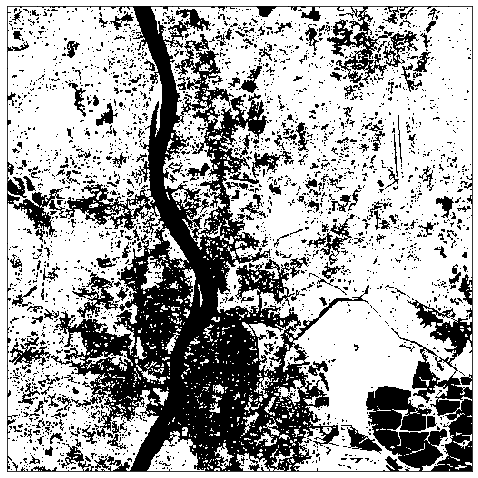

In [9]:
#printing the cluster image
plt.subplot(1,1,1)
plt.imshow(clustered_image, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

In [15]:
# k-means for k=3,4,5
data_output=[]
cluster_color=[[255,255,255],[0,0,0],[0,100,100],[55,55,255],[255,0,0]]
for k in range(3,6):
    cluster_size=[]
    cluster_means=[]
    for p in range(k):
        cluster_means.append(testing_data[numpy.random.randint(0,512), numpy.random.randint(0,512)])
        cluster_size.append(1)
    clustered_image=np.ndarray(shape=(512,512,3), dtype=np.integer)
    for i in range(512):
        for j in range(512):
            min_distance=euclidean_distance(testing_data[i][j],cluster_means[0])
            selected_cluster=0
            for d in range(1,k):
                distance=euclidean_distance(testing_data[i][j],cluster_means[d])
                if distance<min_distance:
                    selected_cluster=d
                    min_distance=distance
            cluster_means[selected_cluster]=(cluster_size[selected_cluster]*cluster_means[selected_cluster]+testing_data[i][j])/(cluster_size[selected_cluster]+1)
            cluster_size[selected_cluster]+=1
            clustered_image[i][j]=cluster_color[selected_cluster]
    data_output.append(clustered_image)

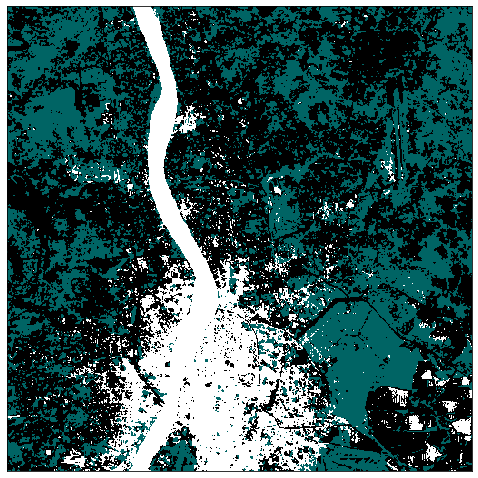

In [16]:
#plotting clustered-image for k=3
plt.subplot(1,1,1)
plt.imshow(data_output[0], cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

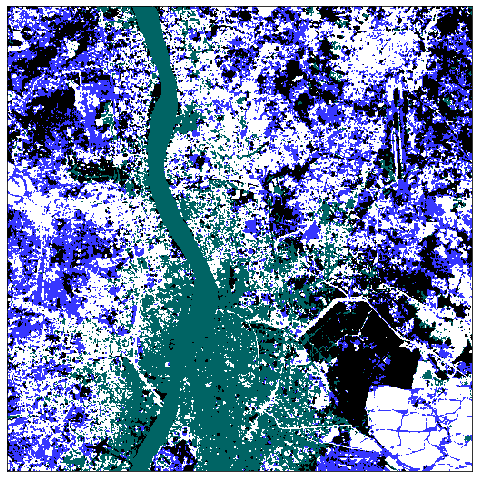

In [17]:
#plotting clustered-image for k=4
plt.subplot(1,1,1)
plt.imshow(data_output[1], cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

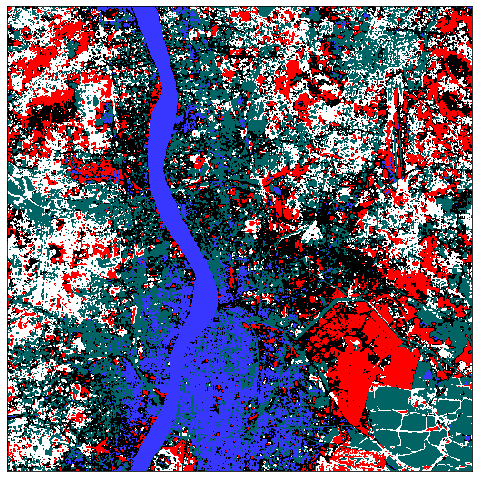

In [18]:
#plotting clustered-image for k=5
plt.subplot(1,1,1)
plt.imshow(data_output[2], cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

In [19]:
#def silhouette(i,j):
    #d1=0
    #count=0
    #for l in range(512):
        #for m in range(512):
            #if main_group[l][m]==main_group[i][j]:
                #count=count+1
                #d1=d1+euclidean_distance(testing_data[i][j],testing_data[l][m])
    #d1=d1/count
    #return d1

In [20]:
#silhouette_coeff = np.ndarray(shape=(512,512), dtype=np.integer)
#for i in range(512):
    #for j in range(512):
        #silhouette_coeff[i][j]=silhouette(i,j)

In [21]:
#print(silhouette_coeff)